In [1]:
import numpy as np
import pandas as pd
import psycopg2

In [2]:
import json

with open('config.json') as f:
    conf = json.load(f)
    host = conf['host']
    database = conf['database']
    user = conf['user']
    passw = conf['passw']

In [3]:
conn_str = "host={} dbname={} user={} password={}".format(host, database, user, passw)
conn = psycopg2.connect(conn_str)

In [4]:
query = '''
SELECT      DISTINCT inc.incident_id,
            date_part('year',inc.incident_date),
            vic.age_num,
            vic.sex_code AS VICTIM_SEX,
            oft.offense_category_name AS OFFENSE_CATEGORY,
            ori.countyname AS COUNTY
            
FROM        nibrs_victim as vic
JOIN        nibrs_offense as off
ON          off.incident_id = vic.incident_id
JOIN        nibrs_offense_type as oft
ON          oft.offense_type_id = off.offense_type_id
JOIN        nibrs_incident as inc
ON          inc.incident_id = vic.incident_id
JOIN        cde_agencies as ags
ON          ags.agency_id = inc.agency_id
JOIN        ori_to_fips as ori
ON          ori.ori9 = ags.ori

WHERE       vic.victim_type_id = 4
AND         inc.incident_date BETWEEN '2016-01-01' AND '2016-12-31';
'''

In [33]:
df = pd.read_sql(query, con=conn)
df.head(3).T

,0,1,2
incident_id,87264241,87264244,87264248
date_part,2016,2016,2016
age_num,59,50,26
victim_sex,F,M,F
offense_category,Larceny/Theft Offenses,Fraud Offenses,Larceny/Theft Offenses
county,BURNET,BURNET,BURNET


In [55]:
crime_df = df.groupby(['county']).incident_id.agg('count')
crime_df = crime_df.to_frame().reset_index()
crime_df = crime_df.rename({'incident_id': 'crime_cnt'}, axis='columns')
crime_df

,county,crime_cnt
0,BELL,3348
1,BEXAR,392
2,BRAZORIA,2994
3,BREWSTER,70
4,BURNET,342
5,CALHOUN,756
6,CAMERON,2
7,COLLIN,16800
8,CORYELL,111
9,DALLAS,4395


In [56]:
df.join(crime_df.set_index('county'), on='county')

,incident_id,date_part,age_num,victim_sex,offense_category,county,crime_cnt
0,87264241,2016.0,59.0,F,Larceny/Theft Offenses,BURNET,342
1,87264244,2016.0,50.0,M,Fraud Offenses,BURNET,342
2,87264248,2016.0,26.0,F,Larceny/Theft Offenses,BURNET,342
3,87264256,2016.0,25.0,F,Assault Offenses,CAMERON,2
4,87264264,2016.0,26.0,M,Larceny/Theft Offenses,CAMERON,2
5,87264268,2016.0,41.0,M,Assault Offenses,BURNET,342
6,87264307,2016.0,33.0,M,Destruction/Damage/Vandalism of Property,BURNET,342
7,87264319,2016.0,23.0,F,Fraud Offenses,BURNET,342
8,87264341,2016.0,48.0,F,Fraud Offenses,BURNET,342
9,87264368,2016.0,26.0,M,Fraud Offenses,BURNET,342


In [57]:
df.head()

,incident_id,date_part,age_num,victim_sex,offense_category,county
0,87264241,2016.0,59.0,F,Larceny/Theft Offenses,BURNET
1,87264244,2016.0,50.0,M,Fraud Offenses,BURNET
2,87264248,2016.0,26.0,F,Larceny/Theft Offenses,BURNET
3,87264256,2016.0,25.0,F,Assault Offenses,CAMERON
4,87264264,2016.0,26.0,M,Larceny/Theft Offenses,CAMERON


In [6]:
age_df = df[['victim_sex','age_num']]

In [7]:
age_df.columns = ['victim_sex','age_num']

axarr = age_df.hist(column='age_num', by ='victim_sex', bins=99, rwidth=0.9, sharex=True, sharey=True, layout = (1, 3), figsize=(15,5))

for ax in axarr.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("Victim Count")

In [8]:
off_df = df[['victim_sex','offense_category']]

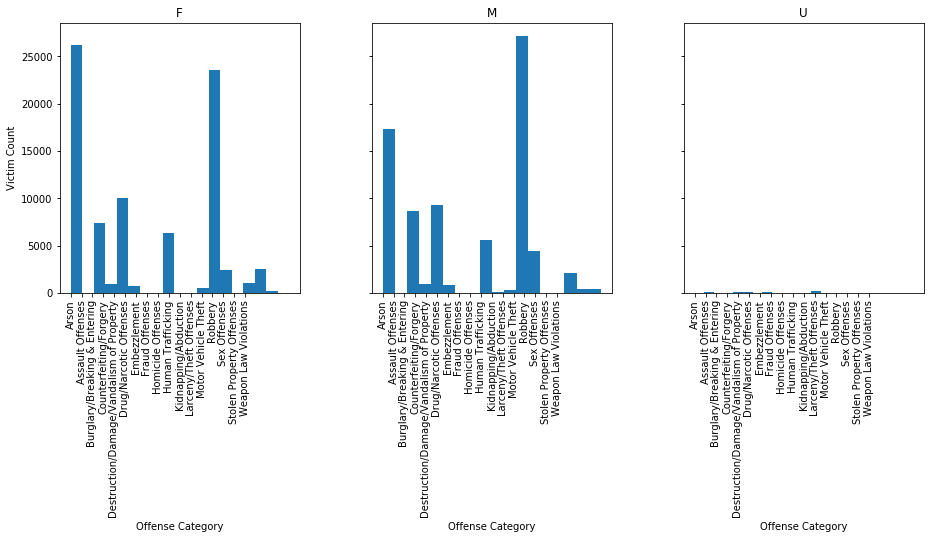

In [9]:
off_df.columns = ['victim_sex','offense_category']

axarr = off_df.hist(column='offense_category', by = 'victim_sex', bins=18, sharex=True, sharey=True, layout = (1, 3), figsize=(15,5))

for ax in axarr.flatten():
    ax.set_xlabel("Offense Category")
    ax.set_ylabel("Victim Count")

In [10]:
df['victim_sex'].value_counts()

F    82116
M    77780
U      920
Name: victim_sex, dtype: int64

In [11]:
df['offense_category'].unique()

array(['Larceny/Theft Offenses', 'Fraud Offenses', 'Assault Offenses',
       'Destruction/Damage/Vandalism of Property',
       'Burglary/Breaking & Entering', 'Counterfeiting/Forgery',
       'Motor Vehicle Theft', 'Robbery', 'Drug/Narcotic Offenses',
       'Sex Offenses', 'Extortion/Blackmail', 'Weapon Law Violations',
       'Kidnapping/Abduction', 'Homicide Offenses',
       'Pornography/Obscene Material', 'Arson',
       'Stolen Property Offenses', 'Embezzlement', 'Human Trafficking',
       'Bribery', 'Prostitution Offenses'], dtype=object)

In [12]:
df.groupby(['victim_sex','offense_category']).incident_id.agg('count')

victim_sex  offense_category                        
F           Arson                                         111
            Assault Offenses                            26105
            Bribery                                         2
            Burglary/Breaking & Entering                 7422
            Counterfeiting/Forgery                        947
            Destruction/Damage/Vandalism of Property     9988
            Drug/Narcotic Offenses                        718
            Embezzlement                                   26
            Extortion/Blackmail                            19
            Fraud Offenses                               6344
            Homicide Offenses                              52
            Human Trafficking                              17
            Kidnapping/Abduction                          512
            Larceny/Theft Offenses                      23535
            Motor Vehicle Theft                          2428
            Porno

In [34]:
hospitals = pd.read_csv('export.csv')
hospitals.head(3).T

,0,1,2
id,25577030,3379501,475013
name,MEMORIAL HERMANN HOSPITAL ...,ANSON GENERAL HOSPITAL ...,TEXAS HEALTH PRESBYTERIAN HOSPITAL ALLEN ...
address,6411 FANNIN STREET ...,101 AVENUE J ...,1105 CENTRAL EXPRESSWAY NORTH ...
city,HOUSTON ...,ANSON ...,ALLEN ...
state,TX,TX,TX
zip,77030,79501,75013
zip4,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE
phone,(713) 704-4000,(325) 823-3231,(972) 747-1000
type,GENERAL ACUTE CARE,GENERAL ACUTE CARE,GENERAL ACUTE CARE
status,OPEN,OPEN,OPEN


In [35]:
hospitals['beds'] = hospitals['beds'].clip_lower(0)

In [36]:
hosp_cnt = hospitals.groupby('county').id.agg('count')

In [37]:
hosp_cnt = hosp_cnt.to_frame().reset_index()

In [38]:
hosp_cnt

,county,id
0,ANDERSON,1
1,ANDREWS,1
2,ANGELINA,2
3,ATASCOSA,1
4,AUSTIN,1
5,BAILEY,1
6,BASTROP,1
7,BAYLOR,1
8,BEE,1
9,BELL,7


In [39]:
test_merge = hospitals.merge(hosp_cnt,on='county')

In [40]:
test_merge.head(3).T

,0,1,2
id_x,25577030,4677521,6177401
name,MEMORIAL HERMANN HOSPITAL ...,HOUSTON METHODIST SAN JACINTO HOSPITAL ...,MEMORIAL HERMANN ORTHOPEDIC AND SPINE HOSPITAL...
address,6411 FANNIN STREET ...,4401 GARTH ROAD ...,5410 WEST LOOP SOUTH ...
city,HOUSTON ...,BAYTOWN ...,BELLAIRE ...
state,TX,TX,TX
zip,77030,77521,77401
zip4,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE
phone,(713) 704-4000,(281) 420-8600,(713) 314-4444
type,GENERAL ACUTE CARE,GENERAL ACUTE CARE,GENERAL ACUTE CARE
status,OPEN,OPEN,OPEN


In [41]:
bed_cnt = hospitals.groupby('county').beds.agg('sum')

In [42]:
bed_cnt = bed_cnt.to_frame().reset_index()

In [43]:
bed_cnt

,county,beds
0,ANDERSON,86
1,ANDREWS,34
2,ANGELINA,420
3,ATASCOSA,67
4,AUSTIN,32
5,BAILEY,25
6,BASTROP,8
7,BAYLOR,49
8,BEE,69
9,BELL,893


In [44]:
hosp = test_merge.merge(bed_cnt,on='county')

In [45]:
hosp.head(3).T

,0,1,2
id_x,25577030,4677521,6177401
name,MEMORIAL HERMANN HOSPITAL ...,HOUSTON METHODIST SAN JACINTO HOSPITAL ...,MEMORIAL HERMANN ORTHOPEDIC AND SPINE HOSPITAL...
address,6411 FANNIN STREET ...,4401 GARTH ROAD ...,5410 WEST LOOP SOUTH ...
city,HOUSTON ...,BAYTOWN ...,BELLAIRE ...
state,TX,TX,TX
zip,77030,77521,77401
zip4,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE
phone,(713) 704-4000,(281) 420-8600,(713) 314-4444
type,GENERAL ACUTE CARE,GENERAL ACUTE CARE,GENERAL ACUTE CARE
status,OPEN,OPEN,OPEN


In [46]:
hosp = hosp.rename({'id_x': 'id', 'id_y': 'count', 'beds_x': 'beds', 'beds_y': 'bed_count'}, axis='columns')

In [47]:
hosp.head(3).T

,0,1,2
id,25577030,4677521,6177401
name,MEMORIAL HERMANN HOSPITAL ...,HOUSTON METHODIST SAN JACINTO HOSPITAL ...,MEMORIAL HERMANN ORTHOPEDIC AND SPINE HOSPITAL...
address,6411 FANNIN STREET ...,4401 GARTH ROAD ...,5410 WEST LOOP SOUTH ...
city,HOUSTON ...,BAYTOWN ...,BELLAIRE ...
state,TX,TX,TX
zip,77030,77521,77401
zip4,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE
phone,(713) 704-4000,(281) 420-8600,(713) 314-4444
type,GENERAL ACUTE CARE,GENERAL ACUTE CARE,GENERAL ACUTE CARE
status,OPEN,OPEN,OPEN


In [48]:
hosp_merge = hosp[['county','count','bed_count']]

In [49]:
#df = df.merge(hosp_merge,on='county')
df = df.join(hosp_merge.set_index('county'), on='county')

ValueError: columns overlap but no suffix specified: Index(['county'], dtype='object')

In [ ]:
df.head(3).T